In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
sns.set_style('ticks')

# Regularized Linear Models

* A	good	way	to	reduce	overfitting	is	to	regularize	the	model(i.e.,	to	constrain	it):	the	fewer	degrees	of	freedom	it	has,	the	harder	it	will	be	for	it to overfit	the	data.
* A	simple	way	to	regularize	a	polynomial	model	is	to	reduce the	number	of	polynomial	degrees.
* For	a	linear	model,	regularization	is	typically	achieved	by	constraining	the	weights	of	the
model.

# Ridge	Regression

* Ridge	Regression	(also	called	Tikhonov	regularization)	is	a	regularized	version	of	Linear
Regression:	a	regularization	term	equal	to	 $ \alpha\sum_{i=1}^{n} θ_{i}^2$ is	added	to	the	cost	function.	
* This forces	the	learning	algorithm	to	not	only	fit	the	data	but	also	keep	the	model	weights	as small	as	possible.	
* Note	that	the	regularization	term	should	only	be	added	to	the	cost function	during	training.	Once	the	model	is	trained,	you	want	to	evaluate	the	model’s performance	using	the	unregularized	performance	measure.

$$ J(θ) = MSE(θ)+ \alpha \frac{1}{2}\sum_{i=1}^{n} θ_{i}^2 $$
* The above equation represents the ridge regression cost function.
* The	hyperparameter	α	controls	how	much	you	want	to	regularize	the	model.	
* If	α	=	0	then Ridge	Regression	is	just	Linear	Regression.	
* If	α	is	very	large,	then	all	weights	end	up	very close	to	zero	and	the	result	is	a	flat	line	going	through	the	data’s	mean.
* Note	that	the	bias	term	θ 0 	is	not	regularized	(the	sum	starts	at	i	=	1,	not	0)

In [2]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [3]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

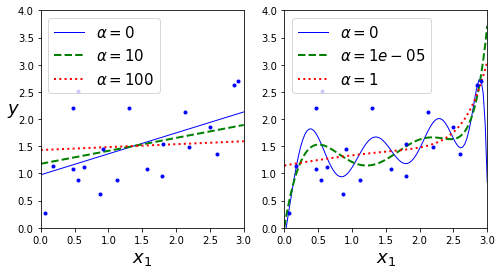

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

* On	the	left,	plain	Ridge	models	are	used,	leading	to	linear	predictions.	
* On	the	right,the	data	is	first	expanded	using	 PolynomialFeatures(degree=10) ,	then	it	is	scaled	using a	 StandardScaler ,	and	finally	the	Ridge	models	are	applied	to	the	resulting	features.
* This is	Polynomial	Regression	with	Ridge	regularization.
##### Increasing	α	leads	to	flatter(i.e.,	less	extreme,	more	reasonable)	predictions;	this	reduces	the	model’s	variance	but increases	its	bias.

* As	with	Linear	Regression,	we	can	perform	Ridge	Regression	either	by	computing	a closed-form	equation	or	by	performing	Gradient	Descent.
* The equation shows	the	closed-form	solution	(where	A	is	the	n	×	n	identity	matrix 13
except	with	a	0	in	the	top-left	cell,	corresponding	to	the	bias	term).
 $$ \hat{θ}=(X^T X+\alpha A)^{-1} X^T y$$

# Ridge	Regression	with	Scikit-Learn	using	a	closed-form	solution

In [5]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
r1 = ridge_reg.fit(X, y)
r2 = ridge_reg.predict([[1.5]])
r2

array([[ 1.55071465]])

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.13500145])

In [7]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.5507201]])

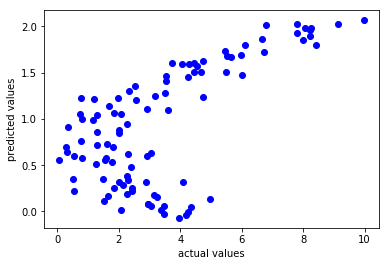

In [93]:
plt.figure()
plt.plot(y, ridge_reg.predict(X), "bo", )
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

In [94]:
plt.figure()
plt.plot(ridge_reg.predict(X), y-ridge_reg.predict(X), "bo")
plt.xlabel("predicted values")
plt.ylabel("residual error")
plt.show()

In [127]:
ridge_reg.predict(X).ravel().shape

(150,)

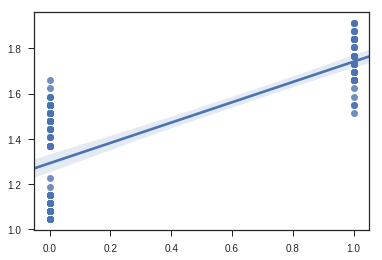

In [128]:
x = sns.regplot(y, ridge_reg.predict(X).ravel())

In [138]:
(y-ridge_reg.predict(X)).ravel().shape

(22500,)

In [136]:
ridge_reg.predict(X).shape

(150, 1)

# Lasso	Regression

* Least	Absolute	Shrinkage	and	Selection	Operator	Regression	(simply	called	Lasso Regression)	is	another	regularized	version	of	Linear	Regression:	just	like	Ridge Regression,	it	adds	a	regularization	term	to	the	cost	function,	but	it	uses	the	$l_{1}$ 	norm	of	the weight	vector	instead	of	half	the	square	of	the	$l_{2}$ 	norm.
$$ J(θ) = MSE(θ)+ \alpha \sum_{i=1}^{n} |θ_{i}| $$

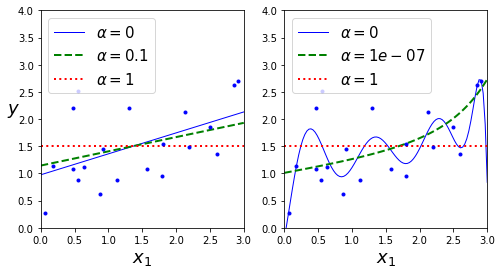

In [8]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

* An	important	characteristic	of	Lasso	Regression	is	that	it	tends	to	completely	eliminate	the weights	of	the	least	important	features	(i.e.,	set	them	to	zero).
* In	other	words,	Lasso Regression	automatically	performs	feature	selection	and	outputs	a	sparse	model	(i.e.,	with few	nonzero	feature	weights).

In [9]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

In [63]:
X[0], y[0]

(array([-0.75275929]), array([ 1.61761105]))

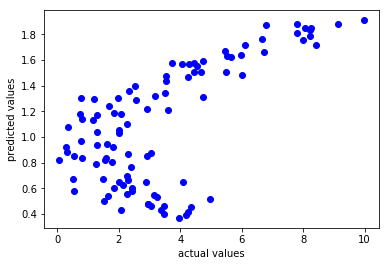

In [95]:
plt.figure()
plt.plot(y, lasso_reg.predict(X), "bo", )
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

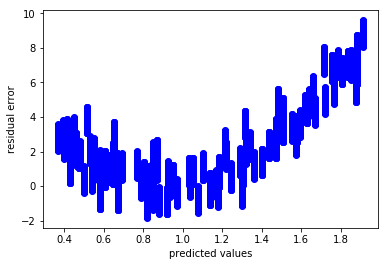

In [96]:
plt.figure()
plt.plot(lasso_reg.predict(X), y-lasso_reg.predict(X), "bo")
plt.xlabel("predicted values")
plt.ylabel("residual error")
plt.show()

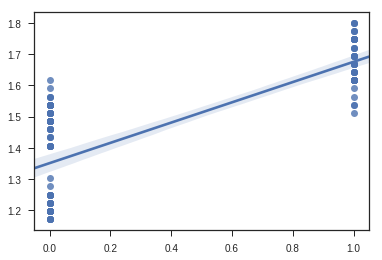

In [114]:
x = sns.regplot(y, lasso_reg.predict(X))

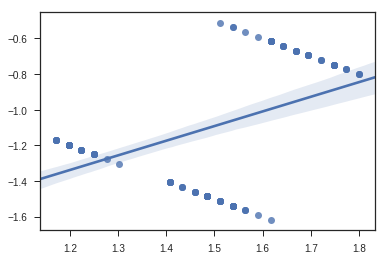

In [115]:
x = sns.regplot(lasso_reg.predict(X), y-lasso_reg.predict(X))

# Elastic	Net

* Elastic	Net	is	a	middle	ground	between	Ridge	Regression	and	Lasso	Regression.	
* The regularization	term	is	a	simple	mix	of	both	Ridge	and	Lasso’s	regularization	terms,	and you	can	control	the	mix	ratio	r.	
* When	r	=	0,	Elastic	Net	is	equivalent	to	Ridge	Regression,and	when	r	=	1,	it	is	equivalent	to	Lasso	Regression
* The cost function of the elasticnet is given below:
 $$ J(θ) = MSE(θ)+r\alpha \sum_{i=1}^{n} |θ_{i}|+\frac{1-r}{2}\alpha \sum_{i=1}^{n} θ_{i}^2$$

In [10]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

In [89]:
plt.figure()
plt.plot(y, elastic_net.predict(X), "bo")
plt.show()

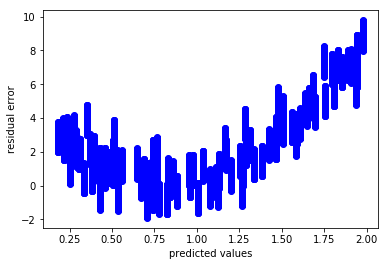

In [97]:
plt.figure()
plt.plot(elastic_net.predict(X), y-elastic_net.predict(X), "bo")
plt.xlabel("predicted values")
plt.ylabel("residual error")
plt.show()

In [140]:
x = sns.regplot(y, elastic_net.predict(X))

In [141]:
x = sns.regplot(elastic_net.predict(X), y-elastic_net.predict(X))

# When	should	we	use	Linear	Regression,	Ridge,	Lasso,	or	Elastic	Net?

* It	is	almost always	preferable	to	have	at	least	a	little	bit	of	regularization,	so	generally	you	should avoid	plain	Linear	Regression.	Ridge	is	a	good	default.
* If	you	suspect	that	only	a	few features	are	actually	useful,	you	should	prefer	Lasso	or	Elastic	Net	since	they	tend	to reduce	the	useless	features’	weights	down	to	zero	as	we	have	discussed.	
* In	general,	Elastic Net	is	preferred	over	Lasso	since	Lasso	may	behave	erratically	when	the	number	of features	is	greater	than	the	number	of	training	instances	or	when	several	features	are strongly	correlated.

# Early	Stopping

* A	very	different	way	to	regularize	iterative	learning	algorithms	such	as	Gradient	Descent is	to	stop	training	as	soon	as	the	validation	error	reaches	a	minimum.	
* This	is	called	early stopping.
* 	As	the	epochs	go	by,	the algorithm	learns	and	its	prediction	error	(RMSE)	on	the	training	set	naturally	goes	down,and	so	does	its	prediction	error	on	the	validation	set.	
* However,	after	a	while	the	validation error	stops	decreasing	and	actually	starts	to	go	back	up.	
* This	indicates	that	the	model	hasstarted	to	overfit	the	training	data.	With	early	stopping	you	just	stop	training	as	soon	as	the validation	error	reaches	the	minimum.	

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

##### As the epocs get increasing, the RMSE for both training and test data sets first decreases upto certain point(global minimum) and then both of them start to increase again.

In [46]:
best_epoch, best_val_rmse

(239, 1.1324590535779686)

# Logistic	Regression

* Some	regression	algorithms	can	be	used	for	classification	as well	(and	vice	versa).	
* Logistic	Regression	(also	called	Logit	Regression)	is	commonly used	to	estimate	the	probability	that	an	instance	belongs	to	a	particular	class.
* If	the	estimated	probability	is	greater	than	50%, then	the	model	predicts	that	the	instance	belongs	to	that	class	(called	the	positive	class,labeled	“1”),	or	else	it	predicts	that	it	does	not	(i.e.,	it	belongs	to	the	negative	class,	labeled “0”).	This	makes	it	a	binary	classifier.

# Estimating	Probabilities

* Just	like	a	Linear	Regression	model,	a	Logistic	Regression	model computes	a	weighted	sum	of	the	input	features	(plus	a	bias	term),	but	instead	of	outputting the	result	directly	like	the	Linear	Regression	model	does,	it	outputs	the	logistic	of	this result

* The estimated	probability	(vectorized	form)of the Logistic	Regression	model is given as
   $$ \hat{p} = h_{\theta}(x) = \sigma(\theta^T . x) $$
* The	logistic	—	also	called	the	logit,	noted	σ(·)	—	is	a	sigmoid	function	(i.e.,	S-shaped)	that outputs	a	number	between	0	and	1.	
* It	is	defined	as	shown	in	the below equation:
$$ \sigma(t)= 1/(1 + exp(-t)   $$

In [11]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

* Once	the	Logistic	Regression	model	has	estimated	the	probability	 $ \hat{p} = h_{\theta}(x)$		that	an instance	x	belongs	to	the	positive	class,	it	can	make	its	prediction	ŷ	easily.
* $\hat{y} = 0 $ if $\hat{p} < 0.5$ and $\hat{y} = 1 $ if $\hat{p} > or =  0.5$ 
* Notice	that	σ(t)	<	0.5	when	t	<	0,	and	σ(t)	≥	0.5	when	t	≥	0,	so	a	Logistic	Regression model	predicts	1	if	θ T 	·	x	is	positive,	and	0	if	it	is	negative.

# Training	and	Cost	Function

* The	objective	of	training	is	to	set	the	parameter	vector	θ
so	that	the	model	estimates	high	probabilities	for	positive	instances	(y	=	1)	and	low
probabilities	for	negative	instances	(y	=	0).
* The cost function of a single training instance is given below:
$$ c(\theta) = -log(\hat{p}),     if      y = 1  $$
$$ c(\theta) = -log(1 - \hat{p}),  if y = 0 $$
* This	cost	function	makes	sense	because	–	log(t)	grows	very	large	when	t	approaches	0,	so the	cost	will	be	large	if	the	model	estimates	a	probability	close	to	0	for	a	positive	instance, and	it	will	also	be	very	large	if	the	model	estimates	a	probability	close	to	1	for	a	negative instance.	
* On	the	other	hand,	–	log(t)	is	close	to	0	when	t	is	close	to	1,	so	the	cost	will	be close	to	0	if	the	estimated	probability	is	close	to	0	for	a	negative	instance	or	close	to	1	for a	positive	instance.

The	cost	function	over	the	whole	training	set	is	simply	the	average	cost	over	all	training
instances.	It	can	be	written	in	a	single	expression	(as	you	can	verify	easily),	called	the	log
loss,	shown	in below equation:
$$ J(\theta) = - 1/m \sum_{i = 1}^m [ y^{(i)}log (\hat{p}^{(i)}) + (1 - y^{(i)})log (1 -\hat{p}^{(i)} )] $$

* There	is	no	known	closed-form	equation	to	compute	the	value	of	θ that	minimizes	this	cost	function	(there	is	no	equivalent	of	the	Normal	Equation).	
* But	the good	news	is	that	this	cost	function	is	convex,	so	Gradient	Descent	(or	any	other optimization	algorithm)	is	guaranteed	to	find	the	global	minimum.

* The	partial	derivatives	of	the	cost	function	withregards	to	the	j th 	model	parameter	θ j 	is	given	by another equation
* For	each	instance	it	computes	the prediction	error	and	multiplies	it	by	the	j th 	feature	value,	and	then	it	computes	the	average over	all	training	instances.	
* Once	you	have	the	gradient	vector	containing	all	the	partial derivatives	you	can	use	it	in	the	Batch	Gradient	Descent	algorithm.	

# Decision	Boundaries

In [100]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [101]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

##### Considering only petal width and finding out if Iris Virginica or not

In [102]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

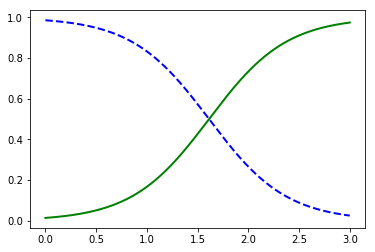

In [15]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.show()

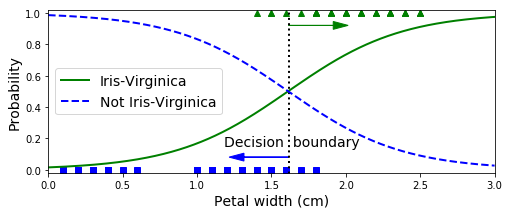

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

##### Above	about	2cm	the	classifier	is	highly	confident	that	the	flower	is	an	Iris-Virginica	(it	outputs	a	high probability	to	that	class),	while	below	1	cm	it	is	highly	confident	that	it	is	not	an	Iris- Virginica	(high	probability	for	the	“Not	Iris-Virginica”	class).	In	between	these	extremes, the	classifier	is	unsure.

* If	you	ask	it	to	predict	the	class	(using	the	 predict() method	rather	than	the	 predict_proba() 	method),	it	will	return	whichever	class	is	the most	likely.	
* Therefore,	there	is	a	decision	boundary	at	around	1.6	cm	where	both probabilities	are	equal	to	50%:	if	the	petal	width	is	higher	than	1.6	cm,	the	classifier	will predict	that	the	flower	is	an	Iris-Virginica,	or	else	it	will	predict	that	it	is	not.

In [17]:
decision_boundary

array([ 1.61561562])

In [18]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

* The	same	dataset	but	this	time	displaying	two	features:	petal	width	and
length.	
* Once	trained,	the	Logistic	Regression	classifier	can	estimate	the	probability	that	a
new	flower	is	an	Iris-Virginica	based	on	these	two	features.	

In [19]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# Softmax	Regression

* The	Logistic	Regression	model	can	be	generalized	to	support	multiple	classes	directly, without	having	to	train	and	combine	multiple	binary	classifiers.	This	is	called	**Softmax	Regression**	or	**Multinomial	Logistic	Regression**.
$$ S_{k}(X) = \theta_{k}^T X $$
* The	idea	is	quite	simple:	when	given	an	instance	x,	the	Softmax	Regression	model	first computes	a	score	$ S_{k}(X)$ 	for	each	class	k,	then	estimates	the	probability	of	each	class	by applying	the	softmax	function	(also	called	the	normalized	exponential)	to	the	scores.
* Each	class	has	its	own	dedicated	parameter	vector	$ θ_{k} $ .	All	these	vectors	are typically	stored	as	rows	in	a	parameter	matrix	Θ
$$ P^k = \sigma(S(X))_{k} =  \frac{\exp(S_{k}(X))}{\sum_{j=1}^{k}\exp(S_{j}(X)} $$
The above equation represents the softmax function

* The	argmax	operator	returns	the	value	of	a	variable	that	maximizes	a	function.	In	this equation,	it	returns	the	value	of	k	that	maximizes	the	estimated	probability	σ(s(x)) k .
 $$ \hat{y} = argmax\sigma(S(X))_{k}=argmaxS_{k}(x)=argmax(\theta_{k}^T x) $$
* The	argmax	operator	returns	the	value	of	a	variable	that	maximizes	a	function.	In	the above equation,	it	returns	the	value	of	k	that	maximizes	the	estimated	probability	σ(s(x)) k .
* The	objective of training 	is	to	have	a	model	that	estimates	a	high	probability for	the	target	class	(and	consequently	a	low	probability	for	the	other	classes).	
* Minimizing the	cost	function	shown	in	Equation	below,	called	the	cross	entropy,	should	lead	to	this objective	because	it	penalizes	the	model	when	it	estimates	a	low	probability	for	a	target class.
 $$ J(Θ) = \frac{-1}{m}\sum_{i=1}^{m} \sum_{k=1}^{k}y_{k}^(i)log(\hat{p}_{k}^(i))$$
* Cross	entropy	is	frequently	used	to	measure	how	well	a	set	of	estimated	class probabilities	match	the	target	classes

In [20]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
softmax_reg.predict([[5, 2]])

array([2])

In [22]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134078e-07,   5.75276066e-02,   9.42471760e-01]])

In [24]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

plt.contourf(x0, x1, zz, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

* The	decision	boundaries are 	represented	by	the	background colors.	
* The	decision	boundaries	between	any	two	classes	are	linear.	
* The	probabilities	for	the	Iris-Versicolor	class,	are represented	by	the	curved	lines(e.g.,	the	line	labeled	with	0.450	represents	the	45%	probability	boundary).	
* The model	can	predict	a	class	that	has	an	estimated	probability	below	50%.	
* For	example,	at	the point	where	all	decision	boundaries	meet,	all	classes	have	an	equal	estimated	probability of	33%.

In [31]:
x0.shape

(200, 500)

In [38]:
y_proba[:, 1].reshape(x0.shape)

array([[  3.73583605e-06,   4.03114943e-06,   4.34980687e-06, ...,
          8.78046758e-02,   8.24800850e-02,   7.74509691e-02],
       [  3.74198824e-06,   4.03778794e-06,   4.35697016e-06, ...,
          7.89962759e-02,   7.41624109e-02,   6.96019818e-02],
       [  3.74815057e-06,   4.04443740e-06,   4.36414524e-06, ...,
          7.10027379e-02,   6.66226235e-02,   6.24945385e-02],
       ..., 
       [  5.16613761e-06,   5.57451399e-06,   6.01517179e-06, ...,
          1.30848721e-11,   1.22200584e-11,   1.14124025e-11],
       [  5.17464522e-06,   5.58369411e-06,   6.02507758e-06, ...,
          1.16596338e-11,   1.08890179e-11,   1.01693339e-11],
       [  5.18316685e-06,   5.59288935e-06,   6.03499969e-06, ...,
          1.03896362e-11,   9.70295774e-12,   9.06166366e-12]])